# Logistic regression
Its a classification algorithm used to predict the categorical dependent variable using set of independent variables.
1. We can't use linear regression for classification problems, bcz LR deals with continuous values, and shift in threshold incase of outliers will affect the model performance.
2. Regularization helps to reduce the overfitting problem

In [1]:
# Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the data set in csv format using pandas read_csv() function
df = pd.read_csv('liver_disease_.csv')
#Getting Sample of the dataset using head() function
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [3]:
#Getting Details of the type of variables in the data set using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [4]:
#Getting Descriptive statistics of the numerical variables using describe() function
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [5]:
#Checking for null values using isnull() function and getting total null value count at variable level using sum() function
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
#We have 4 null values in Albumin_and_Globulin_Ratio and filling that with mean
df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True )

Diagnosed with liver disease:  416
Not diagnosed with liver disease:  167


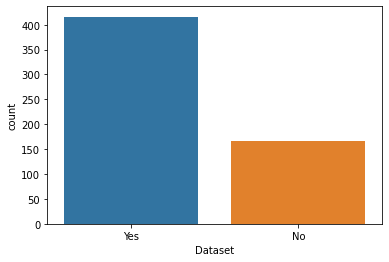

In [7]:
#Visualizing the dependent variable count
sns.countplot(data = df, x = 'Dataset', label='Count')
liverDisease_yes, liverDisease_no = df['Dataset'].value_counts()
print('Diagnosed with liver disease: ',liverDisease_yes)
print('Not diagnosed with liver disease: ',liverDisease_no)

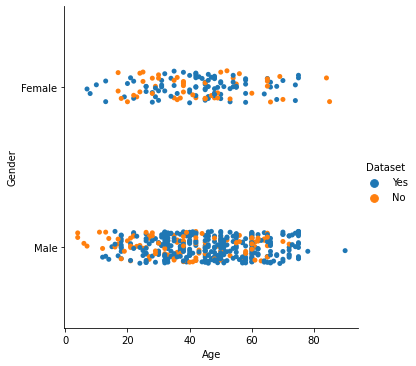

In [8]:
#Visualizing the dependent variable count based on age and gender in scatter plot
# From this we can get an idea that which age group and gender affeted more from this disease
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df)

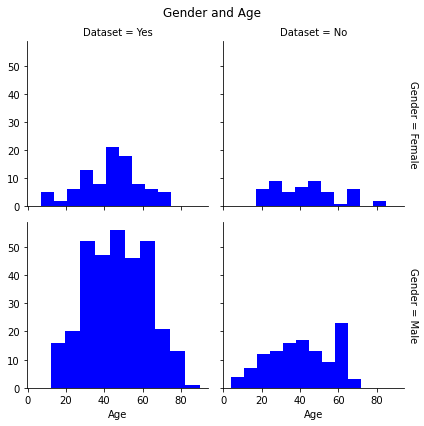

In [9]:
#Visualizing the dependent variable count based on age and gender in histogram plot
# From this we can get an idea that which age group and gender affeted more from this disease
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="blue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Gender and Age');

In [10]:
# Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data
label_encoder = LabelEncoder()
label_encoder.fit(df.Gender.unique())
df['Gender_Encoded'] = label_encoder.transform(df.Gender)
label_encoder.fit(df.Dataset.unique())
df['Dataset_Encoded'] = label_encoder.transform(df.Dataset)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Encoded,Dataset_Encoded
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes,0,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes,1,1


In [11]:
#Removing unwanted columns from the dataset using drop() function independent variables
X = df.drop(['Gender'], axis=1)
X.drop(['Dataset', 'Dataset_Encoded'], axis = 1, inplace = True)
#Assigning dependent data to y
y = df['Dataset_Encoded']

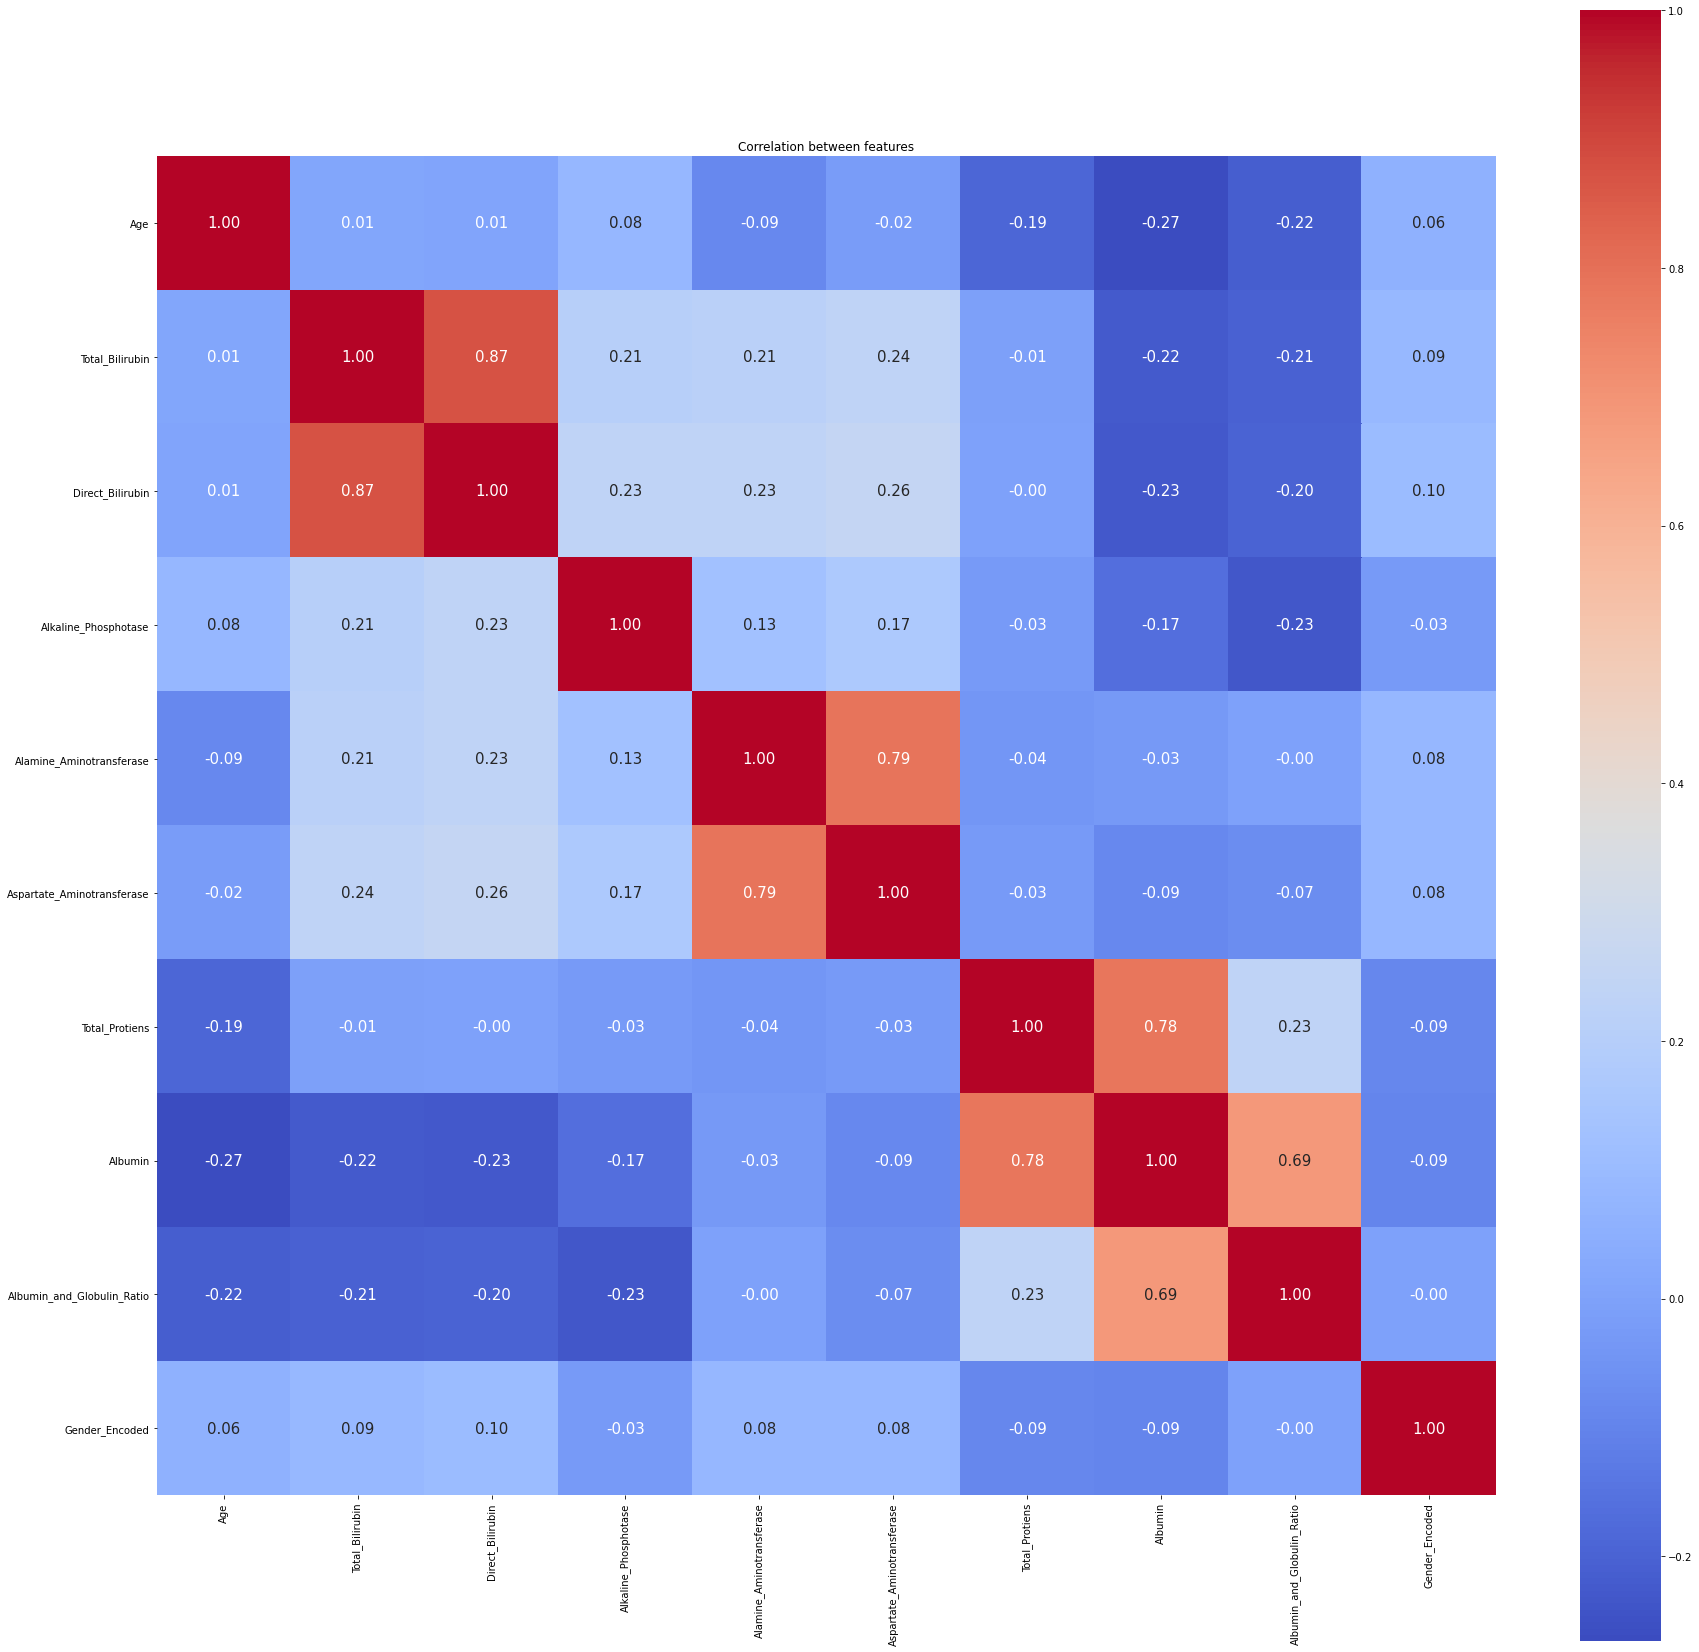

In [12]:
#Checking the correlation between the variables
liverDisease_corr = X.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(liverDisease_corr, cbar=True, square=True, annot= True, fmt= '.2f',annot_kws={'size': 15}, cmap='coolwarm')
plt.title('Correlation between features');

In [13]:
#We drop the variables which have the correlation greater than 0.7
X.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Albumin'], axis = 1, inplace = True)
X.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Gender_Encoded
0,65,0.7,187,16,6.8,0.90,0
1,62,10.9,699,64,7.5,0.74,1
2,62,7.3,490,60,7.0,0.89,1
3,58,1.0,182,14,6.8,1.00,1
4,72,3.9,195,27,7.3,0.40,1


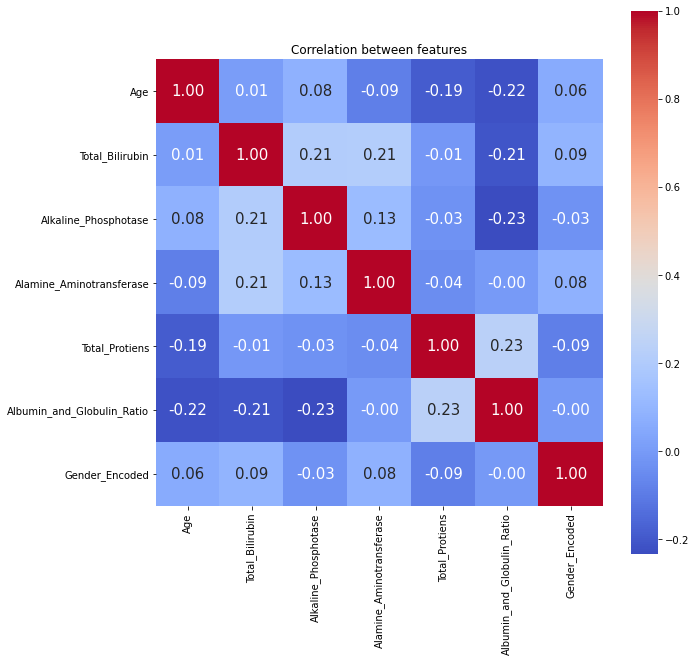

In [14]:
#Again checking the correlation b/w variables after dropping the variables with high correlation
liverDisease_corr = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(liverDisease_corr, cbar=True, square=True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap='coolwarm')
plt.title('Correlation between features');

In [15]:
#Splitting the data into train and test set with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
# Fitting the model with specified model parameters
logreg = LogisticRegression(
    C=15,
    multi_class='ovr',
    penalty='l2',
    solver='lbfgs',
    random_state=42
)
logreg.fit(X_train, y_train)

y_predicted = logreg.predict(X_test)
y_predicted_proba = logreg.predict_proba(X_test)[:, 1]
print('Coefficient: \n', logreg.coef_)
print('Intercept: ', logreg.intercept_)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predicted) * 100))
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, y_predicted_proba) * 100))
print('Classification report: \n\n', classification_report(y_test, y_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predicted))
print('\nTraining set score: {:.2f}%'.format(logreg.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(logreg.score(X_test, y_test) * 100))

Coefficient: 
 [[ 0.02394232  0.12999296  0.00100393  0.01429613  0.12433167 -0.89494882
   0.18545849]]
Intercept:  [-1.36817103]
Accuracy: 73.14%
AUC: 76.77%
Classification report: 

               precision    recall  f1-score   support

           0       0.58      0.22      0.32        50
           1       0.75      0.94      0.83       125

    accuracy                           0.73       175
   macro avg       0.66      0.58      0.58       175
weighted avg       0.70      0.73      0.69       175

Confusion Matrix: 
 [[ 11  39]
 [  8 117]]

Training set score: 73.77%
Testing set score: 73.14%


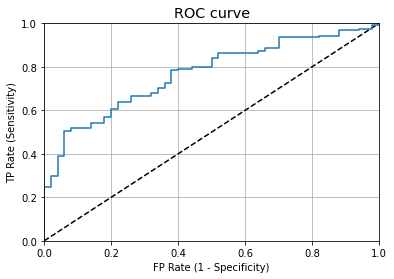

In [17]:
#Visualizing the accuracy of the model for logistic regression
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('FP Rate (1 - Specificity)')
plt.ylabel('TP Rate (Sensitivity)')
plt.grid(True)

In [18]:
# Support vector classifier model fitting
from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred)), print(classification_report(y_test, y_pred))

0.7142857142857143
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.71      1.00      0.83       125

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175



(None, None)

In [19]:
#Random forest model fitting
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred)), print(classification_report(y_test, y_pred))

0.7142857142857143
              precision    recall  f1-score   support

           0       0.50      0.30      0.37        50
           1       0.76      0.88      0.81       125

    accuracy                           0.71       175
   macro avg       0.63      0.59      0.59       175
weighted avg       0.68      0.71      0.69       175



(None, None)

In [20]:
#Fitting KNN classifier model for the data
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(accuracy_score(y_test, y_pred)), print(classification_report(y_test, y_pred))

0.6685714285714286
              precision    recall  f1-score   support

           0       0.39      0.28      0.33        50
           1       0.74      0.82      0.78       125

    accuracy                           0.67       175
   macro avg       0.56      0.55      0.55       175
weighted avg       0.64      0.67      0.65       175



(None, None)

After comparing all classification models accuracy, we can say that logistic regression is best fit model for to classify this liver disease dataset.